# Concrete Compressive Strength Prediction

### Data Collection
In this project we will be using the Concrete Compressive Strength data set from the UCI Machine Learning Repository.

The data contains over 1,000 instances of concrete each with 9 variables (including compressive strength).

### Imports 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

### Reading the dataset

In [2]:
df= pd.read_csv('Concrete_Data_Yeh.csv')
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### A quick summary of the values in the dataset.

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


 # 1. Data Visualization and Analysis
 ### •	 EDA (univariate)
 #### using histogram 

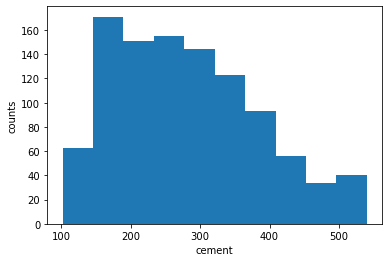

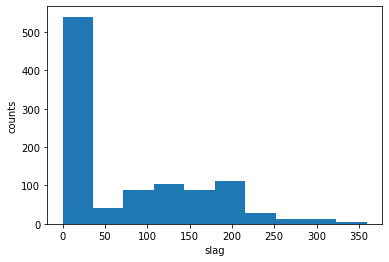

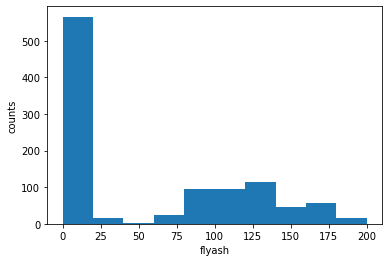

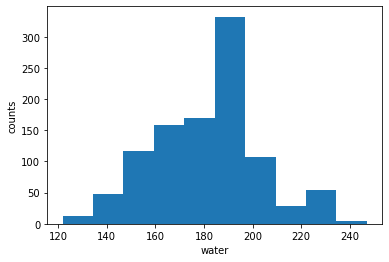

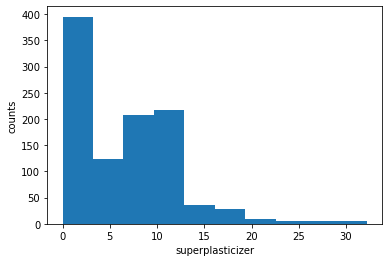

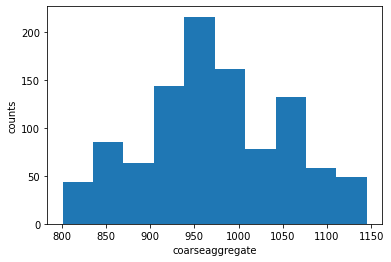

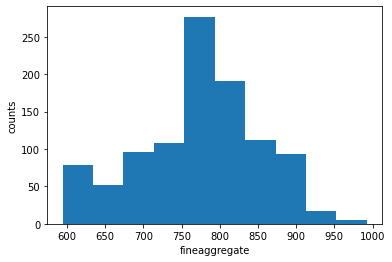

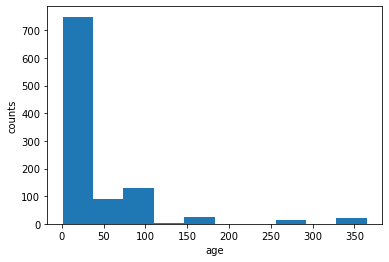

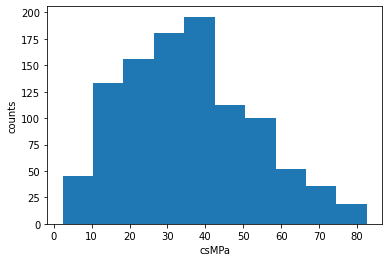

In [5]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()
    

#### using boxplot

In [6]:
col = [x for x in df.columns]

<AxesSubplot:>

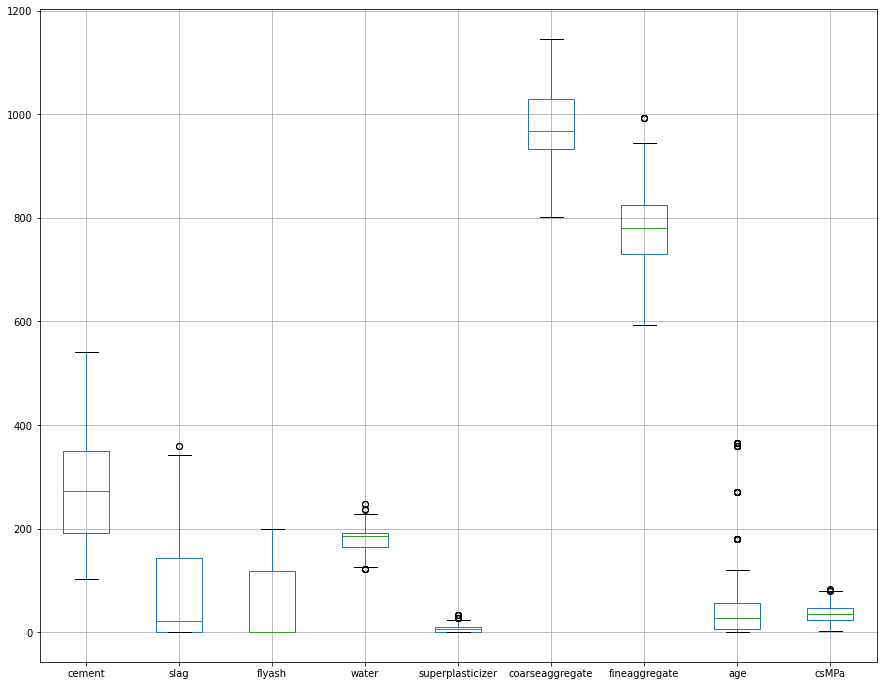

In [7]:
plt.figure(figsize=(15,12))

df.boxplot(col)

 >    •    	Water, Superplasticizer and Age columns have some outliers.

## •	EDA (bivariate)

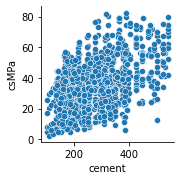

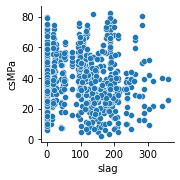

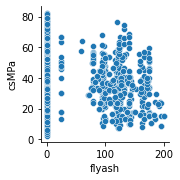

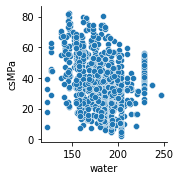

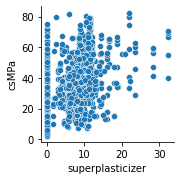

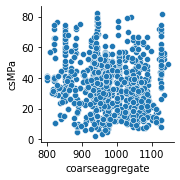

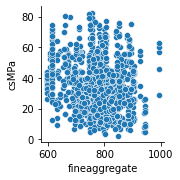

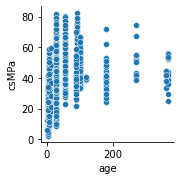

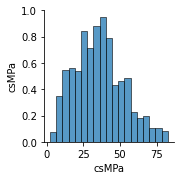

In [8]:
for c in col:
    sns.pairplot(df, x_vars=c, y_vars='csMPa')

# Data preparation
### 1. check null values

In [9]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

 > the data set has no null values.

### 2. removing outliers

In [12]:
def removeOutliers(dataset, col):
    Q3 = np.quantile(dataset[col], 0.75)
    Q1 = np.quantile(dataset[col], 0.25)
    IQR = Q3 - Q1
    
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in dataset[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = dataset.loc[dataset[col].isin(outlier_free_list)]


for i in df.columns:
    if i == df.columns[0]:
        removeOutliers(df, i)
    else:
        removeOutliers(filtered_data, i)
        
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column cement is: 148.84999999999997
IQR value for column slag is: 145.0
IQR value for column flyash is: 118.6
IQR value for column water is: 27.099999999999994
IQR value for column superplasticizer is: 10.4
IQR value for column coarseaggregate is: 107.5
IQR value for column fineaggregate is: 77.39999999999998
IQR value for column age is: 21.0
IQR value for column csMPa is: 21.11
Shape of data after outlier removal is:  (753, 9)


<AxesSubplot:>

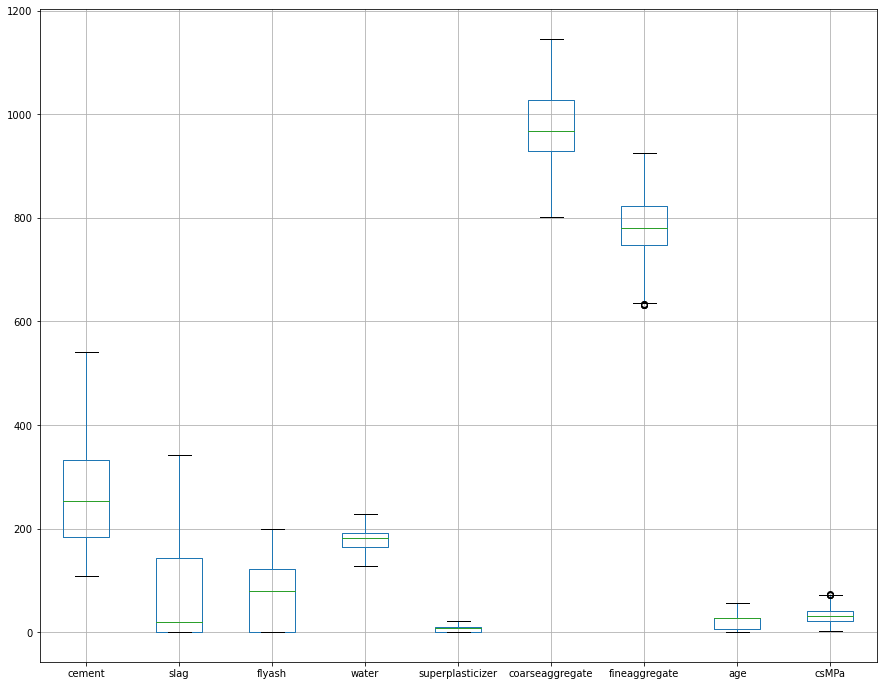

In [13]:
plt.figure(figsize=(15,12))

df.boxplot(col)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 1 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            753 non-null    float64
 1   slag              753 non-null    float64
 2   flyash            753 non-null    float64
 3   water             753 non-null    float64
 4   superplasticizer  753 non-null    float64
 5   coarseaggregate   753 non-null    float64
 6   fineaggregate     753 non-null    float64
 7   age               753 non-null    int64  
 8   csMPa             753 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.8 KB


# 2. Choosing models and training without feature selection
### •	Splitting the data set into train and test sets

In [15]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=1)


### •	Scalling the data set using MinMaxScaler

In [16]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [17]:
x_train

array([[0.67834167, 0.        , 0.        , ..., 0.40406977, 0.43094673,
        0.03636364],
       [0.1350965 , 0.37562116, 0.6605    , ..., 0.59534884, 0.39226332,
        1.        ],
       [0.24731951, 0.        , 0.608     , ..., 0.74593023, 0.50322362,
        0.03636364],
       ...,
       [0.50154873, 0.6211634 , 0.        , ..., 0.14854651, 0.84628436,
        1.        ],
       [0.68787229, 0.0502777 , 0.79      , ..., 0.48255814, 0.00678656,
        0.49090909],
       [0.75458661, 0.31072786, 0.        , ..., 0.14854651, 0.86901934,
        0.10909091]])

In [18]:
x_test

array([[0.0862482 , 0.47105346, 0.57971014, ..., 0.47893082, 0.29709324,
        0.47169811],
       [0.04480115, 0.67067384, 0.        , ..., 0.53710692, 0.40581351,
        0.47169811],
       [0.39218975, 0.63555837, 0.        , ..., 0.64025157, 0.61419404,
        0.47169811],
       ...,
       [0.27168184, 0.        , 0.        , ..., 0.52515723, 0.9211023 ,
        0.20754717],
       [0.60229995, 0.59854476, 0.        , ..., 0.39339623, 0.43676859,
        0.        ],
       [0.04480115, 0.67067384, 0.        , ..., 0.53710692, 0.40581351,
        0.0754717 ]])

### •	fitting the data onto linear regression model

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
error=mean_absolute_error(y_test,pred)
print('LinearRegression')


LinearRegression


#### •	Calculating Mean Absolute Error and R2 Score for the model

In [20]:
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")

r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Mean Absolute Error (the closer to 0 the better) : 5.421457717233774
R2 Score: 0.8150907652793168


### •	fitting the data onto lasso regression

In [21]:
lassor=Lasso()
lassor.fit(x_train,y_train)
pred=lassor.predict(x_test)
error=mean_absolute_error(y_test,pred)
print('Lasso Regression')

Lasso Regression


#### •	Calculating Mean Absolute Error and R2 Score for the model

In [22]:
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")

r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Mean Absolute Error (the closer to 0 the better) : 10.006391072213862
R2 Score: 0.4797857273841426


### •	fitting the data onto Ridge regression

In [23]:
ridger=Ridge()
ridger.fit(x_train,y_train)
pred=ridger.predict(x_test)
error=mean_absolute_error(y_test,pred)
print('Ridge Regression')


Ridge Regression


#### •	Calculating Mean Absolute Error and R2 Score for the model

In [24]:
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")

r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)


Mean Absolute Error (the closer to 0 the better) : 5.314107367314882
R2 Score: 0.8205116193975445


### •	fitting the data onto RandomForestRegressor

In [25]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
error=mean_absolute_error(y_test,pred)
print("Random Forest Regressor")


Random Forest Regressor


#### •	Calculating Mean Absolute Error and R2 Score for the model

In [26]:
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")

r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Mean Absolute Error (the closer to 0 the better) : 4.419013167770422
R2 Score: 0.8772202014437548


#  3. Feature Selection

### • HeatMap
visualize each feature correlation with the other features in the form of a heatmap

<AxesSubplot:>

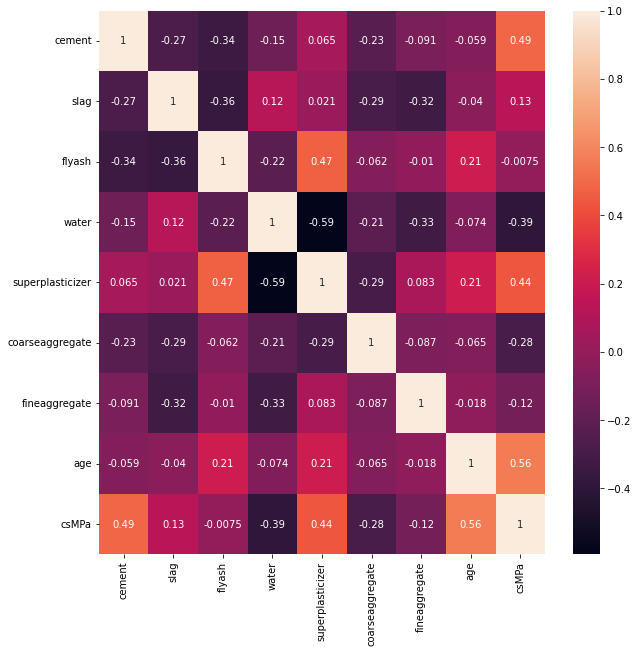

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## PCA – Principal Component Analysis

In [28]:
scaler=StandardScaler()
X= df.iloc[:,:-1]
y=df.iloc[:,-1]
scaler.fit(X)
scaled_data=scaler.transform(X)
pca = PCA(scaled_data.shape[1])
X_pca=pca.fit_transform(scaled_data)
component_names=[f"PC{i}" for i in range (1,X_pca.shape[1]+1)]
X_pca=pd.DataFrame(X_pca,columns=component_names)
X_pca_totrain=X_pca.iloc[:,0:8]
X_pca_totrain


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.565489,-1.278357,1.891124,1.675171,2.521243,0.419469,0.680809,-0.098967
1,3.116685,1.079284,-0.527426,1.638029,-0.211956,0.075076,-0.558663,-0.133409
2,1.461591,-0.153095,-0.467470,-0.616455,-0.815607,1.136498,0.154350,0.053251
3,2.991502,0.779339,-0.213006,2.015728,-0.213055,0.000418,-0.601824,-0.166968
4,1.826094,0.017723,-1.344515,-1.278437,-0.106523,1.327919,0.070793,0.455524
...,...,...,...,...,...,...,...,...
748,-0.358717,1.414843,0.304136,0.201893,-0.393373,-0.137767,0.309857,-0.122704
749,-0.822573,0.999882,0.780319,1.290132,-1.755947,-0.557645,-0.299762,-0.064444
750,0.220557,1.417936,-1.119524,-0.121451,-1.030105,-0.099325,0.231376,-0.065845
751,0.129626,1.003917,-0.468841,-1.502439,0.444551,0.878033,-0.815283,-0.169308


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

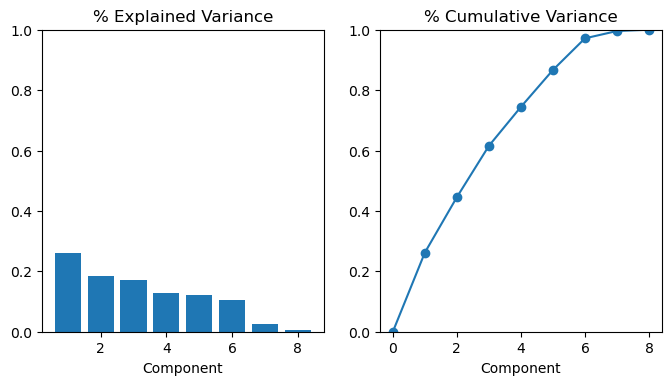

In [29]:
def plotVariance(X_pca):
    fig, axes = plt.subplots(1, 2)
    n = X_pca.n_components_
    grid = np.arange(1, n+1)
    # Explained Variance
    var = X_pca.explained_variance_ratio_
    axes[0].bar(grid, var)
    axes[0].set(xlabel="Component",
                title="% Explained Variance", ylim=(0.0, 1.0))
    # cumulative variance
    cvar = np.cumsum(var)
    axes[1].plot(np.r_[0, grid], np.r_[0, cvar], "o-")
    axes[1].set(xlabel="Component",
                title="% Cumulative Variance", ylim=(0.0, 1.0))
    fig.set(figwidth=8, dpi=100)

    return axes


plotVariance(pca)


## Feature Selection(Filter Methods)
### 1. Select Percentile

In [30]:
#Pearson's correlation feature selection for numeric input and numeric output
X= df.iloc[:,:-1]
y = df.iloc[:, -1]
selected = SelectPercentile(score_func =f_regression, percentile=80)
x_new=selected.fit_transform(X,y)

print(x_new.shape)
selected.get_support()



(753, 6)


array([ True,  True, False,  True,  True,  True, False,  True])

### 2. Select KBest

In [31]:
X= df.iloc[:,:-1]
y = df.iloc[:, -1]
selected = SelectKBest(score_func=f_regression, k=7)
x_new=selected.fit_transform(X,y)

print(x_new.shape)
selected.get_support()


(753, 7)


array([ True,  True, False,  True,  True,  True,  True,  True])

## Feature Selection(Wrapper Methods)
## ●	Recursive Feature Elimination
Selecting the features using Feature ranking with recursive feature elimination method is used to assess the model

In [32]:

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
print(selector.ranking_)


[1 1 2 1 1 4 3 1]


# 4. Choosing model after feature selection

In [33]:
X= df.iloc[:, [0,1,3,4,7]]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=1)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pre = lr.predict(x_test)
maef = mean_absolute_error(y_test, y_pre)
r2f = r2_score(y_test,y_pre)
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")
from sklearn.metrics import r2_score
r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Mean Absolute Error (the closer to 0 the better) : 4.419013167770422
R2 Score: 0.8772202014437548


In [35]:
lassor=Lasso()
lassor.fit(x_train,y_train)
pred=lassor.predict(x_test)
error=mean_absolute_error(y_test,pred)
print('Lasso Regression')
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")
from sklearn.metrics import r2_score
r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Lasso Regression
Mean Absolute Error (the closer to 0 the better) : 10.006391072213862
R2 Score: 0.4797857273841426


In [36]:
ridger=Ridge()
ridger.fit(x_train,y_train)
pred=ridger.predict(x_test)
error=mean_absolute_error(y_test,pred)
print('Ridge Regression')
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")
from sklearn.metrics import r2_score
r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)


Ridge Regression
Mean Absolute Error (the closer to 0 the better) : 5.457464106278665
R2 Score: 0.8106294147410877


In [37]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
error=mean_absolute_error(y_test,pred)
print("Random Forest Regressor")
print(f"Mean Absolute Error (the closer to 0 the better) : {error}")
from sklearn.metrics import r2_score
r2f = r2_score(y_test,pred)
print("R2 Score:",r2f)

Random Forest Regressor
Mean Absolute Error (the closer to 0 the better) : 4.592889724061813
R2 Score: 0.8673721029546342
